In [1]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import importlib

%matplotlib ipympl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

In [48]:
nH = 1e-9
fF = 1e-15
GHz = 1e9
h    = 6.626e-34
GHz = 1e9
e0   = 1.602e-19
Φ_0 = h/(2*e0)
# Circuit parameters
Csh = 15
C   = 15
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ = 50
l = Lq*(Lq+4*Lr) - 4*Δ**2
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)

C_f = Cf * fF
L_f = Lf * nH
E_J = EJ * GHz

In [49]:
E_L_f = (Φ_0/(2*np.pi))**2/L_f / h/ GHz
E_L_f 

6.539994179227587

In [50]:
E_C_f = e0**2 / (2*C_f) / h
E_C_f / GHz

0.7594573959979404

In [51]:
EJ_values = np.geomspace(1e-1,100,200)

In [52]:
EJ_plot = [1, 10, 20]

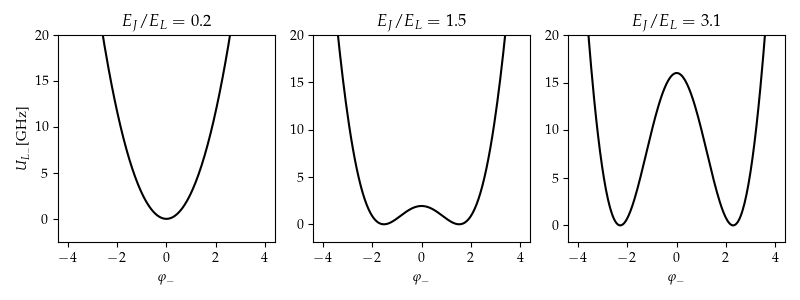

In [53]:
φ_f = np.linspace(- 4, 4,200)

V_f_plot = [0.5 * E_L_f * (φ_f)**2 + EJ * np.cos(φ_f) for EJ in EJ_plot]

fig, axs = plt.subplots(ncols=3, figsize=[8,3])

[ax.plot(φ_f, (V_f-V_f.min()), 'k') for ax, V_f in zip(axs, V_f_plot)]
[ax.set_title(rf'$E_J/E_L={np.round(EJ/E_L_f ,1)}$') for ax, EJ in zip(axs, EJ_plot)]
[ax.set_ylim(top=20) for ax in axs]
[ax.set_xlabel(r'$\varphi_-$') for ax in axs]
axs[0].set_ylabel(r'$U_{L_-}$[GHz]')
fig.tight_layout()
fig.show()

# figs.export('Fluxonium_potential.pdf', fig)
plt.close('all')

In [60]:
EJ_values = np.geomspace(1e-1,150,200)

In [61]:
Φ_fq_limit_vs_EJ = np.zeros(len(EJ_values))
q_fq_limit_vs_EJ = np.zeros(len(EJ_values))
q_n_vs_EJ = np.zeros(len(EJ_values))
Φ_n_vs_EJ = np.zeros(len(EJ_values))

for i, EJ in enumerate(EJ_values):
    fluxonium =  sq_ext.sq_fluxonium( EJ=EJ, CJ=CJ ) 
    fluxonium.diag(2)
    ω_f =  fluxonium._efreqs[1]- fluxonium._efreqs[0] 

    V =  lambda φ: E_L_f*φ**2/2 - EJ*np.cos(φ+np.pi)
    φ_min = sp.optimize.minimize_scalar(V).x
    
    
    Φ_fq_limit_vs_EJ[i] = (Φ_0 / (2 * np.pi)) * φ_min / np.sqrt(sq.hbar) 
    q_fq_limit_vs_EJ[i] = ω_f * C_f * Φ_fq_limit_vs_EJ[i]
    
    q_n_vs_EJ[i] = np.imag( fluxonium.charge_op(0,'eig')[1,0]) 
    Φ_n_vs_EJ[i] = np.real( fluxonium.flux_op(0,'eig')[1,0])  

Φ_r_limit = np.sqrt(0.5*np.sqrt(L_f/C_f))   
q_r_limit = np.sqrt(0.5*np.sqrt(C_f/L_f))   

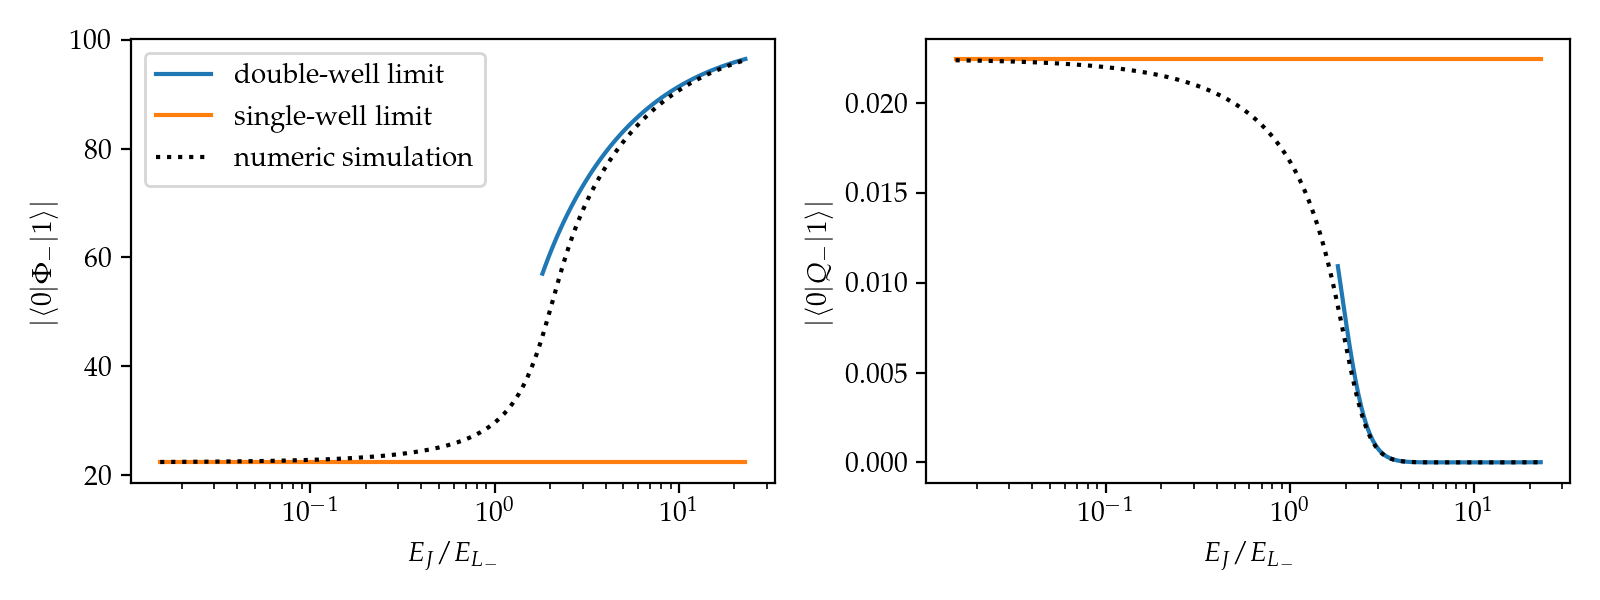

In [70]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=[8,3], dpi=200)
ax1.plot(EJ_values[130:]/E_L_f, Φ_fq_limit_vs_EJ[130:], label='double-well limit')
ax1.plot(EJ_values/E_L_f, Φ_r_limit*np.ones(len(EJ_values)), label='single-well limit')
ax1.plot(EJ_values/E_L_f, Φ_n_vs_EJ,':k', label='numeric simulation')
ax1.set_ylabel(r'$|\langle 0 | \Phi_- |1\rangle|$')
ax1.set_xlabel('$E_J/E_{L_-}$')
ax1.set_xscale('log')
ax1.legend( )
# ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax2.plot(EJ_values[130:]/E_L_f, q_fq_limit_vs_EJ[130:])
ax2.plot(EJ_values/E_L_f, q_r_limit*np.ones(len(EJ_values)))
ax2.plot(EJ_values/E_L_f, q_n_vs_EJ,':k')
ax2.set_xscale('log')
ax2.set_ylabel(r'$|\langle 0 | Q_- |1\rangle|$')
ax2.set_xlabel('$E_J/E_{L_-}$')
fig.tight_layout()
fig.show()
figs.export('flux_and_charge_operators.pdf', fig)